# Session 3 Exercises

In [112]:
#Importing all the necessary packages and loading the csv files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import math
!pip install tabulate
from tabulate import tabulate
from datetime import datetime

datapath = Path('data')

quakes = pd.read_csv(datapath / Path('earthquake.csv'))
faang = pd.read_csv(datapath / Path('faang.csv'), index_col='date', parse_dates=True)
covid_parsed = pd.read_pickle(datapath / Path('covid_parsed.pkl'))

## 1

- Read in the data in the covid.csv file
- Create a date column by parsing the dateRep column into a datetime
- Set the date column as the index
- Use the replace() method to update all occurrences of United_States_of_America and United Kingdom to USA and UK, respectively
- Sort the index

In [113]:
# Reading in the covid data
cov_data = pd.read_csv(datapath / 'covid.csv')

# Creating a date column by parsing the dateRep column into a datetime
cov_data['date'] = pd.to_datetime(cov_data['dateRep'], format='%d/%m/%Y')

# Setting the date column as the index
cov_data.set_index('date', inplace=True)

# Using the replace() method to update country names
cov_data['countriesAndTerritories'] = cov_data['countriesAndTerritories'].replace({
    'United_States_of_America': 'USA',
    'United_Kingdom': 'UK'
})

# Sorting the DataFrame by the date index
cov_data.sort_index(inplace=True)

# Displaying the first few rows of the DataFrame to verify my results
cov_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2019-12-31,31/12/2019,31,12,2019,0,0,Belgium,BE,BEL,11455519.0,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Mexico,MX,MEX,127575529.0,America,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Ecuador,EC,ECU,17373657.0,America,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Russia,RU,RUS,145872260.0,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Netherlands,NL,NLD,17282163.0,Europe,NaN


## 2
With the `earthquake.csv` file, select all earthquakes in Japan with a magnitude of 4 or greater. Display them sorted by time. Only output the magnitude and the place.

In [114]:
# Filtering, sorting, and selecting columns in a single chained operation
quakes_from_japan = (
    quakes[(quakes['place'].str.contains("Japan")) & (quakes['mag'] >= 4)]
    .sort_values(by='time')
    [['mag', 'place']]
)

# Displaying the results
quakes_from_japan

,mag,place
9198,4.6,"3km ESE of Sugito, Japan"
9083,5.1,"23km ENE of Ishinomaki, Japan"
9070,4.7,"96km E of Hasaki, Japan"
8687,4.2,"39km NE of Misawa, Japan"
8555,4.6,"105km ENE of Miyako, Japan"
8550,4.4,"105km ENE of Miyako, Japan"
8431,4.6,"171km E of Nago, Japan"
8376,4.4,"171km E of Nago, Japan"
8327,4.2,"34km ESE of Chitose, Japan"
8324,4.6,"167km E of Nago, Japan"


## 3
Create bins for each full number of earthquake magnitude (magType = 'ml') and count how many are in each bin. Output them in magnitude order.

In [115]:
# Filtering for magType 'ml' and explicitly creating a copy
quake_ml = quakes[quakes['magType'] == 'ml'].copy()

# Defining bins for each full number magnitude
# Assuming earthquake magnitudes range from 0 to 10
bins = np.arange(0, quake_ml['mag'].max() + 1, 1)

# Binning the data
quake_ml['magnitude_bin'] = pd.cut(quake_ml['mag'], bins=bins, include_lowest=True, right=False)

# Counting frequencies in each bin
magnitude_order = quake_ml['magnitude_bin'].value_counts().sort_index()

# Displaying the counts in magnitude order
magnitude_order

magnitude_bin
[0.0, 1.0)    2072
[1.0, 2.0)    3126
[2.0, 3.0)     985
[3.0, 4.0)     153
[4.0, 5.0)       6
[5.0, 6.0)       2
Name: count, dtype: int64

## 4
Using the `faang.csv`: Group by ticker and resample to monthly.

Make the following aggregations:
- Mean opening price
- Max high price
- Min low price
- Mean closing price
- Sum of volume traded

Floating point numbers should have two decimals.

In [116]:
# Ensuring the 'date' column is the index and in datetime format
faang.index = pd.to_datetime(faang.index)

# Grouping by ticker and resample to monthly
faang_monthly = faang.groupby('ticker').resample('M').agg({
    'open': 'mean',
    'high': 'max',
    'low': 'min',
    'close': 'mean',
    'volume': 'sum'
})

# Formatting the floating point numbers to two decimals
faang_monthly = faang_monthly.round(2)

# Displaying the results
faang_monthly

open     high      low    close        volume
ticker date                                                        
AAPL   2018-01-31    43.51    45.03    41.17    43.50  2.638718e+09
       2018-02-28    41.82    45.15    37.56    41.91  3.711577e+09
       2018-03-31    43.76    45.88    41.24    43.62  2.854911e+09
       2018-04-30    42.44    44.74    40.16    42.46  2.664617e+09
       2018-05-31    46.24    47.59    41.32    46.38  2.483905e+09
       2018-06-30    47.18    48.55    45.18    47.16  2.110498e+09
       2018-07-31    47.55    48.99    45.85    47.58  1.574766e+09
       2018-08-31    53.12    57.22    49.33    53.34  2.801276e+09
       2018-09-30    55.58    57.42    53.83    55.52  2.715888e+09
       2018-10-31    55.30    58.37    51.52    55.21  3.158994e+09
       2018-11-30    47.95    55.59    42.56    47.81  3.845306e+09
       2018-12-31    41.31    46.24    36.65    41.07  3.595690e+09
AMZN   2018-01-31  1301.38  1472.58  1170.51  1309.01  9.637120e+07
       2018-02-28  1447.11  1528.70  1265.93  1442.36  1.377840e+08
       2018-03-31  1542.16  1617.54  1365.20  1540.37  1.304001e+08
       2018-04-30  1475.84  1638.10  1352.88  1468.22  1.299196e+08
       2018-05-31  1590.47  1635.00  1546.02  1594.90  7.161550e+07
       2018-06-30  1699.09  1763.10  1635.09  1698.82  8.594130e+07
       2018-07-31  1786.31  1880.05  1678.06  1784.65  9.752110e+07
       2018-08-31  1891.96  2025.57  1776.02  1897.85  9.657580e+07
       2018-09-30  1969.24  2050.50  1865.00  1966.08  9.444550e+07
       2018-10-31  1799.63  2033.19  1476.36  1782.06  1.832208e+08
       2018-11-30  1622.32  1784.00  1420.00  1625.48  1.392900e+08
       2018-12-31  1572.92  1778.34  1307.00  1559.44  1.548127e+08
FB     2018-01-31   184.58   190.66   175.80   184.96  4.956557e+08
       2018-02-28   180.72   195.32   167.18   180.27  5.162516e+08
       2018-03-31   173.45   186.10   149.02   173.49  9.962017e+08
       2018-04-30   164.16   177.10   150.51   163.81  7.500727e+08
       2018-05-31   181.91   192.72   170.23   182.93  4.011441e+08
       2018-06-30   194.97   203.55   186.43   195.27  3.872656e+08
       2018-07-31   199.33   218.62   166.56   199.97  6.470307e+08
       2018-08-31   177.60   188.30   170.27   177.49  5.488327e+08
       2018-09-30   164.23   173.89   158.87   164.38  5.004688e+08
       2018-10-31   154.87   165.88   139.03   154.19  6.224463e+08
       2018-11-30   141.76   154.13   126.85   141.64  5.181517e+08
       2018-12-31   137.53   147.19   123.02   137.16  5.587862e+08
GOOG   2018-01-31  1127.20  1186.89  1045.23  1130.77  2.873840e+07
       2018-02-28  1088.63  1174.00   992.56  1088.21  4.238200e+07
       2018-03-31  1096.11  1177.05   980.64  1091.49  4.535330e+07
       2018-04-30  1038.42  1094.17   990.37  1035.70  4.171590e+07
       2018-05-31  1064.02  1110.75  1006.29  1069.28  3.184940e+07
       2018-06-30  1136.40  1186.29  1096.01  1137.63  3.209600e+07
       2018-07-31  1183.46  1273.89  1093.80  1187.59  3.194010e+07
       2018-08-31  1226.16  1256.50  1188.24  1225.67  2.880840e+07
       2018-09-30  1176.88  1212.99  1146.91  1175.81  2.886240e+07
       2018-10-31  1116.08  1209.96   995.83  1110.94  4.849470e+07
       2018-11-30  1054.97  1095.57   996.02  1056.16  3.673510e+07
       2018-12-31  1042.62  1124.65   970.11  1037.42  4.025760e+07
NFLX   2018-01-31   231.27   286.81   195.42   232.91  2.383776e+08
       2018-02-28   270.87   297.36   236.11   271.44  1.845858e+08
       2018-03-31   312.71   333.98   275.90   312.23  2.634494e+08
       2018-04-30   309.13   338.82   271.22   307.47  2.620060e+08
       2018-05-31   329.78   356.10   305.73   331.54  1.420508e+08
       2018-06-30   384.56   423.21   352.82   384.13  2.440318e+08
       2018-07-31   380.97   419.77   328.00   381.52  3.053938e+08
       2018-08-31   345.41   376.81   310.93   346.26  2.131223e+08
       2018-09-30   363.33   383.20   335.83   362.64  1.708321e+08
       201

## 5

Calculate the z-scores for each numeric column of Amazon's data (faang.csv) but only for Q4 of 2018

In [117]:
# Filtering for Amazon's data and Q4 of 2018
data_from_amazon = faang[(faang['ticker'] == 'AMZN') & (faang.index >= '2018-10-01') & (faang.index <= '2018-12-31')]

# Selecting only numeric columns
numeric_data = data_from_amazon.select_dtypes(include=[np.number])

# Calculating z-scores for each numeric column
zscores = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Displaying the z-scores
zscores

,high,low,open,close,volume
date,,,,,
2018-10-01,2.368006,2.502113,2.337813,2.385848,-1.630411
2018-10-02,2.227302,2.247433,2.190795,2.155037,-0.861879
2018-10-03,2.058955,2.139987,2.068570,2.025489,-0.920345
2018-10-04,1.819474,1.781561,1.850048,1.722816,-0.126582
2018-10-05,1.628173,1.554416,1.642819,1.584748,-0.298771
...,...,...,...,...,...
2018-12-24,-2.159820,-2.187566,-2.179582,-2.226185,-0.141238
2018-12-26,-1.611714,-1.810493,-2.026617,-1.339674,1.123063
2018-12-27,-1.641276,-1.626703,-1.456521,-1.404343,0.849827


## 6
Represent all the values in the FAANG dataset in terms of the first date in the data. To do so, divide all values for each ticker by the values of the first date in the data for that ticker. When data is in this format, we can easily see growth over time.
Show only the first 5 days per ticker.

In [118]:
# Getting unique tickers
ticker_values = faang['ticker'].unique()

# Listing to collect DataFrames for each ticker
dataframes_count = []

# Iterating over each ticker
for ticker in ticker_values:
    # Filtering data for the ticker
    ticker_data = faang[faang['ticker'] == ticker]

    # Checking if 'date' is a column or an index
    if 'date' in ticker_data.columns:
        # If 'date' is a column
        non_numeric_value = ticker_data[['ticker', 'date']]
    else:
        # If 'date' is an index
        non_numeric_value = ticker_data[['ticker']].copy()
        non_numeric_value['date'] = ticker_data.index

    # Selecting only numeric columns for normalization
    numeric_columns = ticker_data.select_dtypes(include=[np.number])

    # Normalizing the numeric data by dividing by the first row's values
    normalized_numeric_value = numeric_columns.div(numeric_columns.iloc[0])

    # Combining normalized numeric data with non-numeric data
    combined = pd.concat([non_numeric_value.reset_index(drop=True), normalized_numeric_value.reset_index(drop=True)], axis=1)

    # Appending the combined data to the list
    dataframes_count.append(combined)

# Concatenating all DataFrames in the list
normalized_faang_data = pd.concat(dataframes_count)

# Sorting the normalized data by ticker and date to ensure order
normalized_faang_data.sort_values(by=['ticker', 'date'], inplace=True)

# Displaying the first 5 days per ticker using tabulate
for ticker in normalized_faang_data['ticker'].unique():
    display_value = normalized_faang_data[normalized_faang_data['ticker'] == ticker].head(5)
    print(f"Ticker: {ticker}\n")
    print(tabulate(display_value, headers='keys', tablefmt='psql'))
    print("\n")

Ticker: AAPL

+----+----------+---------------------+---------+---------+---------+----------+----------+
|    | ticker   | date                |    high |     low |    open |    close |   volume |
|----+----------+---------------------+---------+---------+---------+----------+----------|
|  0 | AAPL     | 2018-01-02 00:00:00 | 1       | 1       | 1       | 1        | 1        |
|  1 | AAPL     | 2018-01-03 00:00:00 | 1.01306 | 1.01595 | 1.01393 | 0.999826 | 1.15503  |
|  2 | AAPL     | 2018-01-04 00:00:00 | 1.00679 | 1.01666 | 1.01399 | 1.00447  | 0.877864 |
|  3 | AAPL     | 2018-01-05 00:00:00 | 1.01782 | 1.02239 | 1.01928 | 1.01591  | 0.925814 |
|  4 | AAPL     | 2018-01-08 00:00:00 | 1.01921 | 1.02759 | 1.02462 | 1.01213  | 0.804816 |
+----+----------+---------------------+---------+---------+---------+----------+----------+


Ticker: AMZN

+----+----------+---------------------+---------+---------+---------+---------+----------+
|    | ticker   | date                |    high |  

## 7
In the 
In the earthquake dataset you want to only leave data for the top 5 countries in terms of number of earthquakes for magType 'ml', 'md' and 'mb'.
Also show the number of earthquakes per country for the above.

In [119]:
# Filter earthquakes for 'ml', 'md', and 'mb' magTypes

quakes_mag_type = quakes[quakes['magType'].isin(['ml', 'md', 'mb'])]
quakes_mag_type = quakes_mag_type.groupby(['magType', 'place']).size().reset_index(name='count')

def top_countries(df):
    return df.nlargest(5, 'count')['place']

# Filter earthquakes to include only the top 5 countries for each magType
print("Top 5 from magType 'ml':")
print(top_countries(quakes_mag_type[quakes_mag_type['magType'] == 'ml']).sort_values(ascending=False))
print("Top 5 from magType 'md':")
print(top_countries(quakes_mag_type[quakes_mag_type['magType'] == 'md']).sort_values(ascending=False))
print("Top 5 from magType 'mb':")
print(top_countries(quakes_mag_type[quakes_mag_type['magType'] == 'mb']).sort_values(ascending=False))

Top 5 from magType 'ml':
5318                    9km NE of Aguanga, CA
5120                    8km NE of Aguanga, CA
3542                 42km ENE of Adak, Alaska
2645    22km ENE of Honaunau-Napoopoo, Hawaii
1718                   10km NE of Aguanga, CA
Name: place, dtype: object
Top 5 from magType 'md':
1554                9km NW of The Geysers, CA
1427                7km NW of The Geysers, CA
1361                6km NW of The Geysers, CA
876     22km ENE of Honaunau-Napoopoo, Hawaii
587               10km WNW of The Geysers, CA
Name: place, dtype: object
Top 5 from magType 'mb':
541          Southwest Indian Ridge
536       South of the Fiji Islands
535                  South of Tonga
522    Indian Ocean Triple Junction
521                     Fiji region
Name: place, dtype: object


## 8
Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the mb magnitude type.

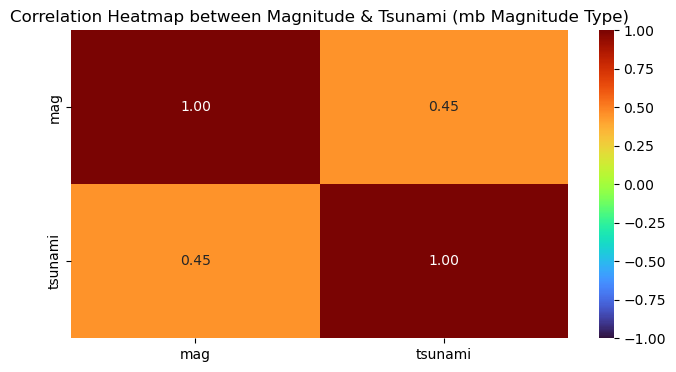

In [120]:
# Filtering earthquakes for 'mb' magType
mb_earth_quakes = quakes[quakes['magType'] == 'mb']

# Creating a correlation matrix between 'mag' and 'tsunami'
correlation = mb_earth_quakes[['mag', 'tsunami']].corr()

# Creating a heatmap to visualize the correlation coefficients
plt.figure(figsize=(8, 4))
sns.heatmap(data=correlation, annot=True, cmap='turbo', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Magnitude & Tsunami (mb Magnitude Type)')
plt.show()

## 9
For the 5 countries with the most covid cases (cumulative), find the day with the largest number of cases.

In [121]:
# Grouping the COVID-19 data by country and calculating cumulative cases
cov_data['cumulative_cases'] = cov_data.groupby('countriesAndTerritories')['cases'].cumsum()

# Finding the top 5 countries with the most cumulative cases
top_5_countries = cov_data.groupby('countriesAndTerritories')['cumulative_cases'].max().nlargest(5).index.tolist()

# Initializing a DataFrame to store the results
result = pd.DataFrame(columns=['Country', 'Cases with more dates', 'Number of cases'])

# Iterating through the top 5 countries
for country in top_5_countries:
    country_data = cov_data[cov_data['countriesAndTerritories'] == country]
    
    # Find the day with the largest number of cases
    no_of_cases = country_data.loc[country_data['cases'].idxmax()]
    
    # Construct the date from 'year', 'month', and 'day' columns
    cases_with_more_dates = pd.to_datetime(f"{no_of_cases['year']}-{no_of_cases['month']}-{no_of_cases['day']}")
    
    result = pd.concat([result, pd.DataFrame({'Country': [country],
                                                    'Cases with more dates': [cases_with_more_dates],
                                                    'Number of cases': [no_of_cases['cases']]})], ignore_index=True)

# Displaying the results
result

,Country,Cases with more dates,Number of cases
0,USA,2020-07-25,78427
1,India,2020-09-17,97894
2,Brazil,2020-07-30,69074
3,Russia,2020-07-18,12640
4,Peru,2020-08-17,10143


## 10
Find the 7-day average change in COVID-19 cases for the last week in the data for the countries found in part 2.

In [122]:
# Converting the 'dateRep' column to datetime
cov_data['dateRep'] = pd.to_datetime(cov_data['dateRep'], format='%d/%m/%Y')

# Filtering the dataset for the specified countries
countries_selected = ['USA', 'India', 'Brazil', 'Russia', 'Peru']
countries_selected_data = cov_data[cov_data['countriesAndTerritories'].isin(countries_selected)].copy()

# Calculating the daily change in cases for each country
countries_selected_data.loc[:, 'daily_change'] = countries_selected_data.groupby('countriesAndTerritories')['cases'].diff()

# Resetting the index to avoid duplicate labels
countries_selected_data.reset_index(drop=True, inplace=True)

# Calculating the 7-day rolling average of the daily change
countries_selected_data['7_day_avg_change'] = countries_selected_data.groupby('countriesAndTerritories')['daily_change'].rolling(window=7).mean().reset_index(level=0, drop=True)

# Finding the last date in the dataset
lastdate = countries_selected_data['dateRep'].max()

# Filtering data for the last week
last_week = countries_selected_data[countries_selected_data['dateRep'] >= (lastdate - pd.DateOffset(weeks=1))]

# Displaying the result in a tabulated format (feels more neat that way)
result = tabulate(last_week[['countriesAndTerritories', 'dateRep', '7_day_avg_change']], headers=['Country', 'Date', '7-Day Avg Change'], tablefmt='grid')
print(result)

+------+-----------+---------------------+--------------------+
|      | Country   | Date                |   7-Day Avg Change |
+======+===========+=====================+====================+
| 1211 | Peru      | 2020-09-12 00:00:00 |           -14.2857 |
+------+-----------+---------------------+--------------------+
| 1212 | Brazil    | 2020-09-12 00:00:00 |         -1068      |
+------+-----------+---------------------+--------------------+
| 1213 | Russia    | 2020-09-12 00:00:00 |            56.2857 |
+------+-----------+---------------------+--------------------+
| 1214 | India     | 2020-09-12 00:00:00 |          1591.14   |
+------+-----------+---------------------+--------------------+
| 1215 | USA       | 2020-09-12 00:00:00 |          -430      |
+------+-----------+---------------------+--------------------+
| 1216 | Brazil    | 2020-09-13 00:00:00 |           479.286  |
+------+-----------+---------------------+--------------------+
| 1217 | USA       | 2020-09-13 00:00:00

## 11
Find the first date that each country other than China had cases:

In [123]:
# Filtering the dataset for countries other than China
countries_other_than_china = cov_data[cov_data['countriesAndTerritories'] != 'China']

# Finding the first date with cases for each country
cases_with_first_date = countries_other_than_china.groupby('countriesAndTerritories')['dateRep'].min()

# Displaying the results
cases_with_first_date

countriesAndTerritories
Afghanistan      2019-12-31
Albania          2020-03-09
Algeria          2019-12-31
Andorra          2020-03-03
Angola           2020-03-22
                    ...    
Vietnam          2019-12-31
Western_Sahara   2020-04-26
Yemen            2020-04-10
Zambia           2020-03-19
Zimbabwe         2020-03-21
Name: dateRep, Length: 209, dtype: datetime64[ns]

## 12
Rank the countries by maximum total cases using percentiles. Sort by cases. Replace all _ with blank spaces. Show percentiles with two decimals.

In [124]:
# Replacing underscores in the 'countriesAndTerritories' column with blank spaces
cov_data['countriesAndTerritories'] = cov_data['countriesAndTerritories'].str.replace('_', ' ')

# Grouping the data by country and calculate the maximum total cases
country_with_max_cases = cov_data.groupby('countriesAndTerritories')['cases'].max()

# Calculating percentiles with two decimal places
percentiles = country_with_max_cases.rank(pct=True, ascending=False) * 100
percentiles = percentiles.round(2)

# Creating a new DataFrame to display the results
result = pd.DataFrame({
    'Country': country_with_max_cases.index,
    'Max Total Cases': country_with_max_cases.values,
    'Percentile': percentiles
})

# Sorting the DataFrame by maximum total cases in descending order
result = result.sort_values(by='Max Total Cases', ascending=False)

# Displaying the sorted DataFrame
result

,Country,Max Total Cases,Percentile
countriesAndTerritories,,,
India,India,97894,0.48
USA,USA,78427,0.95
Brazil,Brazil,69074,1.43
Chile,Chile,36179,1.90
Spain,Spain,27404,2.38
...,...,...,...
Laos,Laos,4,98.10
"Bonaire, Saint Eustatius and Saba","Bonaire, Saint Eustatius and Saba",4,98.10
Holy See,Holy See,4,98.10


## 13
Write a Python function that matches a word containing 'z', not at the start or end of the word. It should output if it found a match.

In [125]:
def find_a_word_z(text):
    # Using regular expression to find words 'z', not at the start or end
    given_pattern = r'\b\w*z\w*\b'
    matches = re.findall(given_pattern, text, re.IGNORECASE)  # Case insensitive

    if matches:
        return True, matches
    else:
        return False, []

# Showing an example of the usage:
text = "This is a test. Zen, Zip, Zag and Zap are words with 'z'."
found, words_matched = find_a_word_z(text)

if found:
    print("Match found! With a Words containing 'z' (not at start or end):")
    print(words_matched)
else:
    print("No matches found.")

Match found! With a Words containing 'z' (not at start or end):
['Zen', 'Zip', 'Zag', 'Zap', 'z']


## 14
Write a Python program to remove leading zeros from an IP address (e.g.: 216.08.094.196 should become 216.8.94.196).

In [126]:
def leading_zeros(ip_address):
    # Splitting the IP address into parts
    parts = ip_address.split('.')

    # Removing leading zeros from each part and format it
    formatted_parts = [str(int(part)) for part in parts]

    # Joining the formatted parts back into an IP address
    cleaned_ip_address = '.'.join(formatted_parts)

    return cleaned_ip_address

# Showing an example of this usage:
ip_address = "216.08.094.196"
cleaned_ip_address = leading_zeros(ip_address)
print("Original IP address:", ip_address)
print("Cleaned IP address:", cleaned_ip_address)

Original IP address: 216.08.094.196
Cleaned IP address: 216.8.94.196


## 15
Write a Python program to convert a date of yyyy-mm-dd format to dd-mm-yyyy format.

2026-01-02 should become 02-01-2026

In [127]:
def convert_date(input_date):
    try:
        # Parsing the input date in yyyy-mm-dd format
        input_date1 = datetime.strptime(input_date, '%Y-%m-%d')

        # Formatting the date as dd-mm-yyyy
        converted_date2 = input_date1.strftime('%d-%m-%Y')

        return converted_date2
    except ValueError:
        return "Invalid date format. Please use yyyy-mm-dd."

# Sharing an example of this usage:
input_date = "2026-01-02"
converted_date2 = convert_date(input_date)
print("Original date:", input_date)
print("Converted date:", converted_date2)

Original date: 2026-01-02
Converted date: 02-01-2026


## 16
Write a Python program to extract year, month and date from an url.

`url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"`

output: [('2016', '09', '02')]

In [128]:
def extract_date(url):
    # Defining a regular expression pattern to match the date in yyyy/mm/dd format
    given_pattern = r'(\d{4})/(\d{2})/(\d{2})'

    # Searching for the pattern in the URL
    match = re.search(given_pattern, url)

    if match:
        # Extracting the year, month, and date from the matched groups
        year, month, day = match.groups()
        return [(year, month, day)]
    else:
        return []

# Sharing an example of this usage:
url = "https://www.washingtonpost.com/news/football-insider/wp/2016/09/02/odell-beckhams-fame-rests-on-one-stupid-little-ball-josh-norman-tells-author/"
date = extract_date(url)
print(date)

[('2016', '09', '02')]


## 17
Write a Python program to separate and print the numbers of a given string.

`String = "Ten 10, Twenty 20, Thirty 30"`

In [129]:
# Inputing string
strg = "Ten 10, Twenty 20, Thirty 30"

# Using regular expression to find all numbers in the string
nos = re.findall(r'\d+', strg)

# Printing the extracted numbers
for num in nos:
    print(num)

10
20
30


## 18
Write a Python program to replace maximum 2 occurrences of space, comma, or dot with a colon.

In [130]:
# Inputing the string
strg = "Hello, world. How you doing? Test text."

# Using regular expression to replace the max 2 occurrences of space, comma, or dot with a colon
result = re.sub(r'[ ,.]{1,2}', ':', strg, count=2)
result

'Hello:world:How you doing? Test text.'

## 19
Write a Python program to extract values between quotation marks of a string.

In [131]:
text1 = '"Python", "PHP", "Java"'

# Using regular expression to extract values between quotation marks
output = re.findall(r'"(.*?)"', text1)

# Printing the extracted values
for match in output:
    print(match)

Python
PHP
Java


## 20
Write a Python program to remove multiple spaces in a string.

In [132]:
text1 = 'Python      Exercises'

# Using regular expression to remove multiple spaces
output = re.sub(r'\s+', ' ', text1)
output

'Python Exercises'

## 21
Write a Python program to find all adverbs (ending on ly) and their positions in a given sentence.

In [133]:
text = "Clearly, he has no excuse for such lying behavior."

# Using regular expression to find adverbs ending in "ly"
adverb = re.finditer(r'\b\w+ly\b', text, re.IGNORECASE)

# Iterating through the matches and printing their positions and values
for match in adverb:
    print(f"Adverb: {match.group()} at position {match.start()}")

Adverb: Clearly at position 0


## 22
Write a Python program to concatenate the consecutive numbers in a given string.

Sample text:
Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready.

Sample solution:
Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.

In [134]:
txt = "Enter at 1 20 Kearny Street. The security desk can direct you to floor 1 6. Please have your identification ready."

# Using regular expression to find consecutive numbers and concatenate them
output = re.sub(r'(\d+) (\d+)', r'\1\2', txt)

# Displaying the results
output

'Enter at 120 Kearny Street. The security desk can direct you to floor 16. Please have your identification ready.'

## 23
Write a Python function that checks whether a word stars and ends with a vowel in a given string. Return true if a word matches the condition; otherwise, return false.

Sample Data:
- ("Red Orange White") -> True
- ("Red White Black") -> False
- ("abcd dkise eosksu") -> True

In [135]:
def word_start_and_end_with_vowel(text):
    # Spliting the text into words
    words = text.split()
    
    # Defining a regular expression pattern to match words starting and ending with a vowel
    given_pattern = r'\b[aeiouAEIOU][a-zA-Z]*[aeiouAEIOU]\b'
    
    # Iterating through the words and checking if they match the pattern
    for word in words:
        if re.match(given_pattern, word):
            return True
    return False

# Sample Data
text1 = "Red Orange White"
text2 = "Red White Black"
text3 = "abcd dkise eosksu"

# Testing the function
print(word_start_and_end_with_vowel(text1))  # True
print(word_start_and_end_with_vowel(text2))  # False
print(word_start_and_end_with_vowel(text3))  # True

True
False
True


## 24
Write a Python program to separate and print the numbers and their position of a given string.

In [136]:
text = "The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly."

def find_num_with_positions(text):
    # Using regular expression to find all numbers and their positions
    given_pattern = r'\b\d+\b'
    matches = re.finditer(given_pattern, text)
    
    # Iterating through matches and print the number and its position
    for match in matches:
        number = match.group()
        position = match.start()
        print(f"Number: {number}, Position: {position}")

# Sample Data
text = "The following example creates 50 an ArrayList with a capacity of 50 elements. Four elements are then added to the ArrayList and the ArrayList is trimmed accordingly."

# Calling the function
find_num_with_positions(text)

Number: 50, Position: 30
Number: 50, Position: 65


## 25
The given input strings contains some text followed by - followed by a number. Replace that number with its log value using math.log()

- `s1 = 'first-3.14'`
- `s2 = 'next-123'`

In [137]:
s1 = 'first-3.14'
s2 = 'next-123'

def replacing_log_value(input_str):
    # Spliting the input string at the "-" character
    parts = input_str.split("-")
    
    if len(parts) == 2:
        text = parts[0]
        num_str = parts[1]
        
        try:
            number = float(num_str)
            if number > 0:
                log_value = math.log(number)
                new_str = f"{text}-{log_value:.2f}"
                return new_str
            else:
                return input_str 
        except ValueError:
            return input_str 
    else:
        return input_str  

# Sample Data
s1 = 'first-3.14'
s2 = 'next-123'

# Calling the function and printing the results
result_1 = replacing_log_value(s1)
result_2 = replacing_log_value(s2)

print(result_1)  # Output: 'first-1.14'
print(result_2)  # Output: 'next-4.82'

first-1.14
next-4.81


## 26
Extract all words between ( and ) from the given input string as a list. Assume that the input will not contain any broken parentheses.

Text:
`ip = 'another (way) to reuse (portion) matched (by) capture groups'`

In [138]:
ip = 'another (way) to reuse (portion) matched (by) capture groups'

# Using regular expression to find all words between ( and )
output = re.findall(r'\((.*?)\)', ip)

# Printing the list of extracted words
print(output)

['way', 'portion', 'by']


## 27
Add [] around words starting with s and containing e and t in any order.

text:
`ip = 'sequoia subtle exhibit asset sets2 tests si_te'`

In [139]:
ip = 'sequoia subtle exhibit asset sets2 tests si_te'

# Using regular expression to find and modify words
output = re.sub(r'\bs[^ ]*e[^ ]*t[^ ]*\b', r'[\g<0>]', ip)
output

'sequoia subtle exhibit asset [sets2] tests si_te'